In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv("data/smoker_train.csv")
df_train.drop_duplicates(inplace=True)
df_train["triglyceride5"] = df_train["triglyceride"] / 5
df_train["chol_diff"] = df_train["Cholesterol"]-df_train["HDL"]-df_train["LDL"]-df_train["triglyceride5"]

df = df_train[(df_train["chol_diff"] < 30) & (df_train["chol_diff"] > -30)]


In [ ]:
# df_train_subset = df_train[['HDL', 'LDL', 'triglyceride5', 'Cholesterol']].head(30)
# ax = df_train_subset[['HDL', 'LDL', 'triglyceride5']].plot(kind='bar', stacked=True, figsize=(12,6))
# df_train_subset['Cholesterol'].plot(ax=ax, color='black', marker='o', linewidth=2, label='Cholesterol', secondary_y=False)
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
df_train["chol_diff"] = df_train["Cholesterol"]-df_train["HDL"]-df_train["LDL"]-df_train["triglyceride5"]
# df_train["chol_diff"] = df_train["chol_diff"].abs()
# num_exact_zero = (df_train["chol_diff"] == 0).sum()
# num_st_one = (df_train["chol_diff"] < 1).sum()
# num_st_30 = (df_train["chol_diff"] < 30).sum()

# print(f"==0: {num_exact_zero}")
# print(f"<1 : {num_st_one}")
# print(f"<30 : {num_st_30}")

# df_train = df_train[df_train["chol_diff"] >= 30]

# plt.figure(figsize=(8, 5))
# df_train["chol_diff"].hist(bins=30, color='skyblue', edgecolor='black')
# plt.xlabel("Absolute difference between the actual and expected cholesterol levels")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df_train["chol_diff"], df_train["triglyceride"], alpha=0.7, color='teal', edgecolor='k')
plt.ylabel("Triglyceride")
plt.xlabel("Abweichung vom erwarteten LDL-Wert nach der Friedewald-Formel")
# plt.title("Triglyceride vs. Cholesterol Difference")
# plt.tight_layout()
sc = plt.scatter(df_train["chol_diff"], df_train["triglyceride"], c=df_train["LDL"], alpha=0.7, cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='LDL')
plt.show()

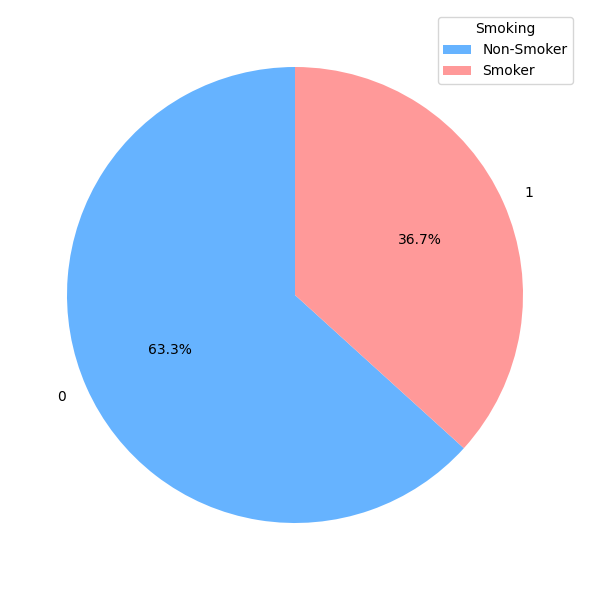

In [3]:
smoking_counts = df_train["smoking"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
# plt.title("Distribution of Smoking Status")
plt.legend(title="Smoking", labels=["Non-Smoker", "Smoker"])
plt.tight_layout()
plt.show()

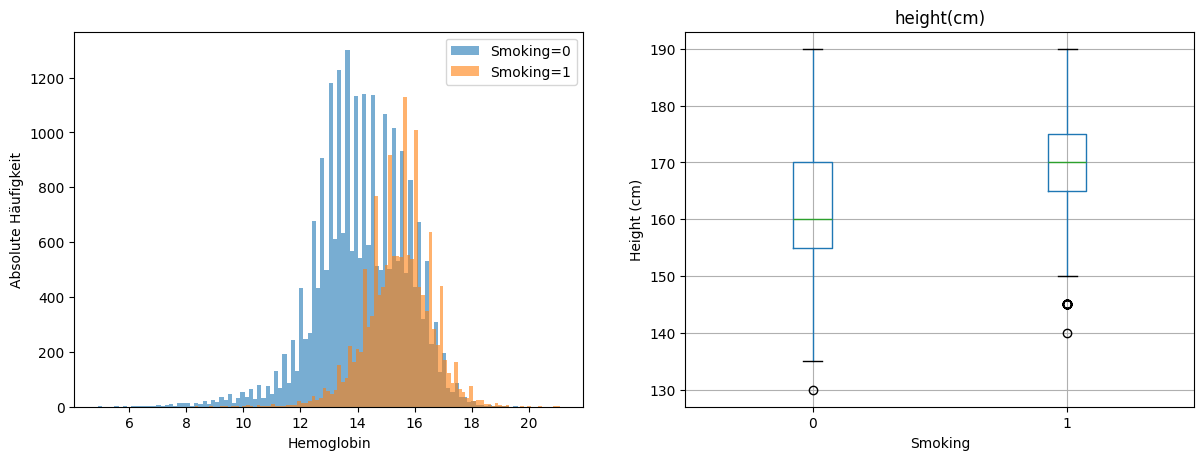

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hemoglobin histogram grouped by smoking
for label, group in df_train.groupby('smoking'):
    axes[0].hist(group['hemoglobin'], bins=100, alpha=0.6, label=f'Smoking={label}')
axes[0].set_xlabel('Hemoglobin')
axes[0].set_ylabel('Absolute Häufigkeit')
# axes[0].set_title('Hemoglobin Distribution by Smoking')
axes[0].legend()

# Height boxplot grouped by smoking
df_train.boxplot(column='height(cm)', by='smoking', ax=axes[1])
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Height (cm)')
# axes[1].set_title('Height Distribution by Smoking')
axes[1].set_xticklabels([0, 1])
axes[1].get_figure().suptitle('')  # Remove automatic suptitle

# plt.tight_layout()
plt.show()